In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/SeptimoSemestre/ModDL"

Mounted at /content/drive
/content/drive/MyDrive/SeptimoSemestre/ModDL


In [3]:
base = 'forklift'
train = os.path.join(base,'train')
validation = os.path.join(base,'val')
test = os.path.join(base,'test')

In [4]:
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							width_shift_range = 0.2,
							height_shift_range = 0.2,
							zoom_range = 0.2,
							horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
							train,
							target_size = (150, 150),
							batch_size = 30,
							class_mode ='binary')

Found 1519 images belonging to 2 classes.


In [5]:
val_datagen = ImageDataGenerator(1./255)

val_generator = val_datagen.flow_from_directory(
							validation,
							target_size = (150,150),
							batch_size =30,
							class_mode= 'binary')

Found 187 images belonging to 2 classes.


In [6]:
conv_base= VGG16(weights='imagenet',
								include_top = False,
								input_shape = (150,150,3))

58889256/58889256 [==============================] - 0s 0us/step


In [7]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

conv_base.trainable = False

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(lr=2e-5),
						metrics=['acc'])

In [10]:
history = model.fit_generator(train_generator,
				steps_per_epoch= 25,
				epochs= 5,
				validation_data= val_generator,
				validation_steps= 25)

<ipython-input-10-ffd43f4de605>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/5
25/25 [==============================] - ETA: 0s - loss: 0.6407 - acc: 0.8200

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


25/25 [==============================] - 139s 5s/step - loss: 0.6407 - acc: 0.8200 - val_loss: 7.0412 - val_acc: 0.8289
Epoch 2/5
25/25 [==============================] - 43s 2s/step - loss: 0.2152 - acc: 0.9133
Epoch 3/5
25/25 [==============================] - 24s 937ms/step - loss: 0.1250 - acc: 0.9467
Epoch 4/5
25/25 [==============================] - 14s 580ms/step - loss: 0.1160 - acc: 0.9594
Epoch 5/5
25/25 [==============================] - 11s 454ms/step - loss: 0.0979 - acc: 0.9560


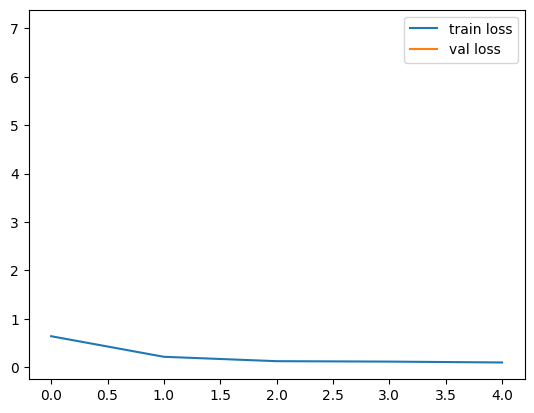

In [11]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

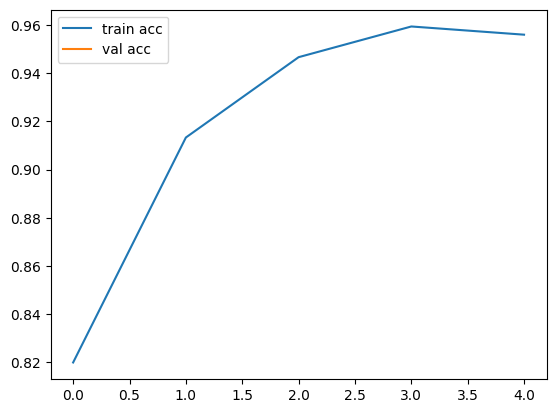

In [12]:
 # accuracies
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.show()

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print("Accuracy = ",acc)
print("Validation Accuracy = ",val_acc)
print("Loss = ",loss)
print("Validation Loss = ",val_loss)

Accuracy =  [0.8199999928474426, 0.9133333563804626, 0.9466666579246521, 0.9594045877456665, 0.9559999704360962]
Validation Accuracy =  [0.8288770318031311]
Loss =  [0.6407301425933838, 0.21522648632526398, 0.1249552071094513, 0.11596377938985825, 0.0979069396853447]
Validation Loss =  [7.041151523590088]


In [14]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps = 25)
print('\ntest acc :\n', test_acc)

Found 560 images belonging to 2 classes.


<ipython-input-14-bd2ecfd8dbb8>:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps = 25)



test acc :
 0.9760000109672546
